## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Your code here - remember to use markdown cells for comments as well!
BUSINESS UNDERSTANDING

The company is venturing into the entertainment industry by launching a new movie studio. Unlike established studios, it currently lacks experience and domain knowledge about what makes a film successful in the market. Since large competitors are already producing original content, the company needs a data-driven approach to identify profitable opportunities and reduce risks

Main Objective

The overarching goal is to understand what types of movies perform best at the box office so that the company can strategically invest in producing films that have the highest likelihood of commercial success
Specific Objectives

The specific objectives of  the company are:
i. To determine which genres perform best in ratings and popularity
ii.To assess whether runtime and release year influence movie success
iii. To analyze the relationship between production budget and worldwide gross revenue
iv. To evaluate the effect of ratings and popularity on box office performance

DATA UNDERSTANDING

Data Source
The dataset is based on IMDb-like movie data. It contains multiple relational tables about movies, people, and ratings. It  is organized into multiple tables (entities), each connected by keys (mostly movie_id or person_id). It captures movies, people (actors, directors, writers), ratings, and attributes.

1. bom.movie_gross.csv.gz (Box Office Mojo)

What it contains: Domestic and possibly international gross revenue for movies.

Key fields:

title

domestic_gross

foreign_gross

Usefulness: Provides the financial performance of films in terms of revenue earned at the box office.

2. tn.movie_budgets.csv.gz (The Numbers)

What it contains: Production budget and worldwide gross.

Key fields:

movie

production_budget

domestic_gross

worldwide_gross

Usefulness: Helps analyze return on investment (ROI) and profitability by comparing budgets to revenues.

3. im.db.zip (IMDb database)

What it contains: Several relational tables (like the ERD you showed earlier).

Key tables:

movie_basics → movie_id, title, start_year, runtime_minutes, genres

movie_ratings → movie_id, averagerating, numvotes

principals/directors/writers → information about cast and crew

Usefulness: Provides movie attributes (genre, runtime, year) and performance metrics (ratings, popularity).

4. rt.movie_info.tsv.gz (Rotten Tomatoes Info)

What it contains: Critics and audience aggregated scores.

Key fields:

movie_id or title

critic_score

audience_score

Usefulness: Lets you compare critical reception vs audience reception, and whether critics influence success.

5. rt.reviews.tsv.gz (Rotten Tomatoes Reviews)

What it contains: Individual critic reviews and sentiments.

Key fields:

review_id

movie_id

critic_name

publication

review_text

fresh/rotten label

Usefulness: Can be used for sentiment analysis and linking early reviews to box office success.

6. tmdb.movies.csv.gz (The Movie Database)

What it contains: Additional metadata like production companies, countries, languages.

Key fields:

movie_id

original_language

production_companies

production_countries

Usefulness: Useful for studying regional/market preferences and the influence of production companies.


WWhat the Data Captures Overall

•	Movie characteristics → title, genre, runtime, release year, production companies, countries.
•	Performance measures → IMDb ratings, Rotten Tomatoes critic/audience scores, number of votes, box office grosses.
•	Financial data → budgets, domestic/international/worldwide revenue.
•	People dimension → directors, writers, actors, their experience and past success.

Data Quality Considerations
•	Missing values: some fields (e.g., runtime, birth year, death year) may be incomplete.
•	Multiple genres: movies can have multiple genres, requiring cleaning/normalization.
•	Skewed ratings: ratings may be biased (some genres or movies get far more votes).
•	Duplicates in akas: same movie may appear with different names across countries


In [1]:
#To determine which genres perform best in ratings and popularity, only need two IMDb tables from your zipped folder:
#movie_basics and movie_ratings
import pandas as pd
import numpy as np
import zipfile

In [2]:
#Reading datasets from zipped file
box_mojo_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
numbers_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
# Load TheMovieDB (TMDB) movies dataset
tmdb_movies_df = pd.read_csv("zippedData/tmdb.movies.csv.gz", compression="gzip")

1. EXPLORING BOX_MOJO_DATASET

In [3]:
box_mojo_df.head()
box_mojo_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


From the dataset, the column foreign_gross has NaN values is non number values.

1.1 To check the Datatypes of columns

In [4]:
box_mojo_df.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

The data type of column_gross is object

1.2 Remove $, commas, and convert to float

In [5]:
box_mojo_df['foreign_gross'] = (
    box_mojo_df['foreign_gross']
    .replace('[\$,]', '', regex=True)   # remove $ and commas
    .replace('', '0')                   # handle empty strings
    .astype(float)                      # convert to float
)
box_mojo_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


The data type for forein gross is now float

In [6]:
# Make column names consistent
box_mojo_df.columns = [c.strip().lower() for c in box_mojo_df.columns]
box_mojo_df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

1.3 To check for missing values

In [7]:
 def missing_report(box_mojo_df):
    miss = box_mojo_df.isna().sum().sort_values(ascending=False)
    pct = (box_mojo_df.isna().mean()*100).sort_values(ascending=False)
    rep = pd.DataFrame({"missing_count": miss, "missing_pct": pct})
    return rep[rep["missing_count"] > 0]

print("\nMissingness BEFORE imputation:")
print(missing_report(box_mojo_df))


Missingness BEFORE imputation:
                missing_count  missing_pct
foreign_gross            1350    39.858282
domestic_gross             28     0.826690
studio                      5     0.147623


In [8]:
#treat empty strings/whitespace as missing
box_mojo_df= box_mojo_df.replace(r'^\s*$', pd.NA, regex=True)
#% missing per column (sorted)
pct_missing_cols = (box_mojo_df.isna().mean() * 100).round(2).sort_values(ascending=False)
print("Percent missing per column (%):\n", pct_missing_cols, "\n")

Percent missing per column (%):
 foreign_gross     39.86
domestic_gross     0.83
studio             0.15
year               0.00
title              0.00
dtype: float64 



We note thats percentage missing values for all the columns in the BoxMojo Dataset are less than 40% .
30–40% missing → Dropping is often safer than imputing (imputation may add too much noise).

In [9]:
# Drop missing values (if needed)
box_mojo_drop = box_mojo_df.dropna()
box_mojo_drop

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000.0,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000.0,2018
3309,Time Freak,Grindstone,10000.0,256000.0,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018


1.4 Checking missing values after dropping them

In [10]:
pct_missing_cols = (box_mojo_drop.isna().mean() * 100).round(2).sort_values(ascending=False)
print("Percent missing per column (%):\n", pct_missing_cols, "\n")

Percent missing per column (%):
 year              0.0
foreign_gross     0.0
domestic_gross    0.0
studio            0.0
title             0.0
dtype: float64 



percentage missing values in all columns is 0.0

1.5 To remove duplicates

In [11]:
# Check how many duplicates exist
duplicates_count = box_mojo_drop.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_count}")

Number of duplicate rows: 0


In [12]:
 box_mojo_drop.isnull().values.any()

False

In [13]:
box_mojo_drop.describe()

,domestic_gross,foreign_gross,year
count,2.007000e+03,2.007000e+03,2007.000000
mean,4.701984e+07,7.579038e+07,2013.506228
std,8.162689e+07,1.381796e+08,2.597997
min,4.000000e+02,6.000000e+02,2010.000000
25%,6.700000e+05,3.900000e+06,2011.000000
50%,1.670000e+07,1.940000e+07,2013.000000
75%,5.605000e+07,7.595000e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


1.8 To visualize Boxmojo dataset

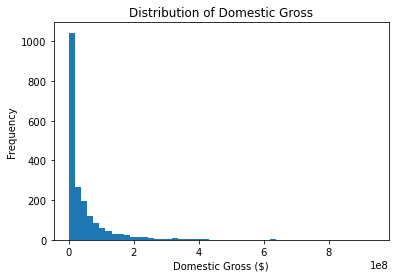

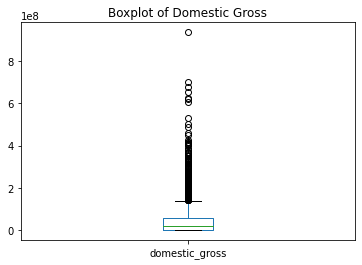

In [14]:
import matplotlib.pyplot as plt

# Example: domestic gross
plt.hist(box_mojo_drop['domestic_gross'], bins=50)
plt.title("Distribution of Domestic Gross")
plt.xlabel("Domestic Gross ($)")
plt.ylabel("Frequency")
plt.show()

# Boxplot
box_mojo_drop['domestic_gross'].plot(kind='box', title="Boxplot of Domestic Gross")
plt.show()


Many outliers are abover the upper whisker. The boxplot shows a right-skewed distribution of domestic gross. Most movies earn relatively little, while a small number of blockbusters generate extremely high domestic grosses, appearing as numerous outliers.

Now we have a clean Box mojo data set ready to use though with outliers

In [15]:
Q1 = box_mojo_drop['domestic_gross'].quantile(0.25)
Q3 = box_mojo_drop['domestic_gross'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = box_mojo_drop[(box_mojo_drop['domestic_gross'] < lower_bound) | 
                       (box_mojo_drop['domestic_gross'] > upper_bound)]
print("Number of outliers:", outliers.shape[0])


Number of outliers: 181


These are number of outliers in domestic_gross column alone are 181

In [16]:
Q1 = box_mojo_drop['foreign_gross'].quantile(0.25)
Q3 = box_mojo_drop['foreign_gross'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = box_mojo_drop[(box_mojo_drop['foreign_gross'] < lower_bound) | 
                       (box_mojo_drop['foreign_gross'] > upper_bound)]
print("Number of outliers:", outliers.shape[0])

Number of outliers: 256


These are number of outliers in foreign_gross column alone are 256

A log transformation is the cleanest way to handle outliers in movie revenue data because it compresses extreme blockbuster values without dropping them.

In [17]:
box_mojo_drop = box_mojo_drop.copy()  # make a safe copy

box_mojo_drop['domestic_gross_log'] = np.log1p(box_mojo_drop['domestic_gross'])
box_mojo_drop['foreign_gross_log'] = np.log1p(box_mojo_drop['foreign_gross'])

    2.TO EXPLORE NUMBERS DATASET

In [18]:
numbers_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [19]:
numbers_df.shape

(5782, 6)

The dataset has 5782 rows and 6 columns

2.1 To check column data types. 

In [20]:
numbers_df.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [21]:
numbers_df.isnull().values.any()

False

2.2  To check for missing values

In [22]:
#Missingness report 
def missing_report(numbers_df):
    miss = numbers_df.isna().sum().sort_values(ascending=False)
    pct = (numbers_df.isna().mean()*100).sort_values(ascending=False)
    rep = pd.DataFrame({"missing_count": miss, "missing_pct": pct})
    return rep[rep["missing_count"] > 0]

print("\nMissingness BEFORE imputation:")
print(missing_report(numbers_df))


Missingness BEFORE imputation:
Empty DataFrame
Columns: [missing_count, missing_pct]
Index: []


Numbers Dataset has no missing values

2.3  To show duplicated rows

In [23]:
numbers_df[numbers_df.duplicated()]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross


The dataset has no duplicates

2.4 To clean $ and commas and release_date to datetime

In [24]:
# Clean $ and commas from numeric columns
for col in ['production_budget', 'domestic_gross', 'worldwide_gross']:
    numbers_df[col] = (
        numbers_df[col]
        .replace('[\$,]', '', regex=True)
        .replace('', '0')        # handle empty strings
        .astype(float)           # use float to avoid overflow
    )

# Convert release_date to datetime
numbers_df['release_date'] = pd.to_datetime(numbers_df['release_date'])


In [25]:
numbers_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00
5778,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00


The dataset is clean  with no $, commas and release_date changed to datetime

2.5 To visualize the dataset 

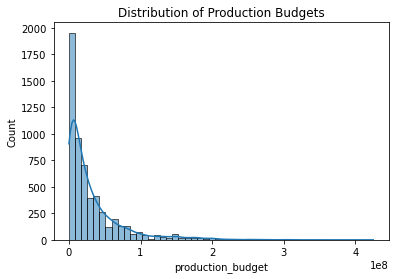

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(numbers_df['production_budget'], bins=50, kde=True)
plt.title("Distribution of Production Budgets")
plt.show()

From the histogram, The production budgets distribution is positively skewed — most movies are made with small to medium budgets, while a few blockbusters with extremely high budgets stretch the tail to the right. It also indicates outliers present.

2.6 Detecting Outliers

In [27]:
Q1 = numbers_df['production_budget'].quantile(0.25)
Q3 = numbers_df['production_budget'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = numbers_df[(numbers_df['production_budget'] < lower_bound) |
                      (numbers_df['production_budget'] > upper_bound)]
print(outliers.shape)


(431, 6)


2.7 To remove outliers using the criteria: if lower than the lower bound and if greater than the upper bound

In [28]:
numbers_df_no_outliers = numbers_df[
    (numbers_df['production_budget'] >= lower_bound) &
    (numbers_df['production_budget'] <= upper_bound)
]
numbers_df_no_outliers

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
431,32,2008-02-14,The Spiderwick Chronicles,92500000.0,71195053.0,162839667.0
432,33,2004-11-05,The Incredibles,92000000.0,261441092.0,614726752.0
433,34,2013-02-14,A Good Day to Die Hard,92000000.0,67349198.0,304249198.0
434,35,2004-04-09,The Alamo,92000000.0,22406362.0,23911362.0
435,36,1995-12-22,Cutthroat Island,92000000.0,10017322.0,18517322.0
...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.0,0.0,0.0
5778,79,1999-04-02,Following,6000.0,48482.0,240495.0
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1338.0
5780,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.0


2.8 the dataset is clean, no outliiers

2.9 To visualize after removing outliers

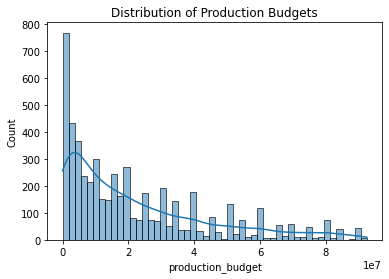

In [29]:
sns.histplot(numbers_df_no_outliers['production_budget'], bins=50, kde=True)
plt.title("Distribution of Production Budgets")
plt.show()

After removing the outliers, the histogram is now less extreme compared to before.

Most movies are still clustered toward lower production budgets (below ~$20M).

The long right tail has been reduced because extreme blockbusters were removed

from the output, the dataset Numbers has no duplicated rows

3. EXPLORING IMDB DATASET

In [30]:
with zipfile.ZipFile('zippedData/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('zippedData/')

In [31]:
#load the dataset
import sqlite3
conn = sqlite3.connect('zippedData/im.db')
#check the tables in the database
tables = pd.read_sql("""SELECT name FROM sqlite_master WHERE type='table';""", conn)
print(tables)

            name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers
